# Лабораторная работа 6
# САФИН РАМАЗ

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, ensemble, tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model, ensemble
%matplotlib inline

In [3]:
%%capture
import wget
!wget https://www.dropbox.com/s/bbm6rxqb4bsfl2d/training_data.xlsx
!wget https://www.dropbox.com/s/gjhur7eyzcv265y/test_data.xlsx

In [4]:
training_data = pd.read_excel('training_data.xlsx')
training_data.head()

,Unnamed: 0,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,1071800,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,1458828,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,890437,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,463498,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,322774,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [5]:
training_data = pd.read_excel('training_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
training_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [6]:
training_data.shape

(4913, 12)

In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4913 non-null   int64  
 1   year          4913 non-null   int64  
 2   condition     4913 non-null   int64  
 3   cylinders     4913 non-null   int64  
 4   odometer      4913 non-null   int64  
 5   title_status  4913 non-null   object 
 6   transmission  4913 non-null   object 
 7   drive         4651 non-null   object 
 8   size          3825 non-null   object 
 9   lat           4913 non-null   float64
 10  long          4913 non-null   float64
 11  weather       4801 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 460.7+ KB


In [8]:
training_data.dropna(inplace=True)
training_data.shape
training_data = training_data._get_numeric_data()
training_data.head()

,price,year,condition,cylinders,odometer,lat,long,weather
0,43900,2016,4,6,43500,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,45.518031,-122.578752,50.0


In [9]:
training_data.shape

(3659, 8)

# Построение гистограмм числовых признаков

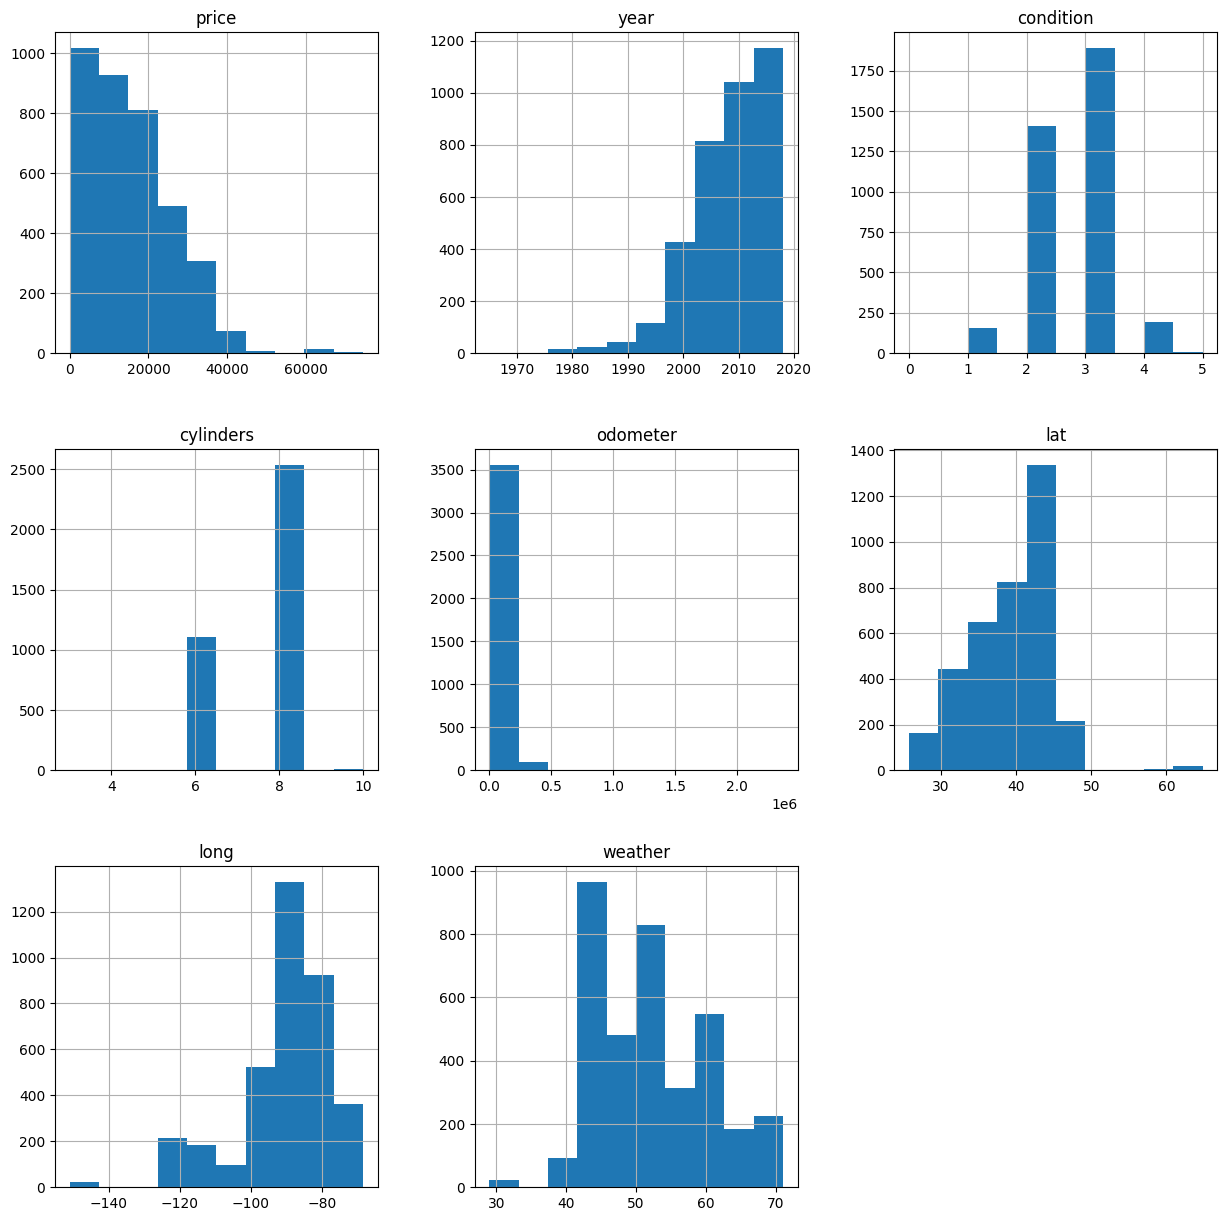

In [10]:
training_data.hist(figsize=(15, 15))
plt.show()

In [11]:
target_variable_name = 'price'
features = training_data.drop(target_variable_name, axis=1).columns
X_train, y_train = training_data[features], training_data[target_variable_name]

In [12]:
linear_regression_model = linear_model.LinearRegression()
linear_regression_model

LinearRegression()

In [13]:
random_forest_model = ensemble.RandomForestRegressor(random_state = 42)
random_forest_model

RandomForestRegressor(random_state=42)

In [14]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [15]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
test_data = pd.read_excel('test_data.xlsx')
test_data.head()

,Unnamed: 0,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,255757,5990,2004,4,8,210445,clean,automatic,4wd,full-size,38.731803,-90.073678,48.0
1,1561727,18995,2015,2,6,142282,clean,automatic,4wd,full-size,42.504823,-92.405569,47.0
2,510003,23500,2012,3,6,100710,clean,automatic,4wd,full-size,36.060541,-95.795447,57.0
3,1126482,24988,2012,4,6,85572,clean,automatic,4wd,NaN,30.457703,-84.347448,65.0
4,155165,20995,2014,3,6,157556,clean,automatic,NaN,full-size,42.701772,-89.008858,45.0


In [17]:
test_data = pd.read_excel('test_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
test_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,5990,2004,4,8,210445,clean,automatic,4wd,full-size,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,clean,automatic,4wd,full-size,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,clean,automatic,4wd,full-size,36.060541,-95.795447,57.0
3,24988,2012,4,6,85572,clean,automatic,4wd,NaN,30.457703,-84.347448,65.0
4,20995,2014,3,6,157556,clean,automatic,NaN,full-size,42.701772,-89.008858,45.0


In [18]:
test_data.shape

(2104, 12)

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2104 non-null   int64  
 1   year          2104 non-null   int64  
 2   condition     2104 non-null   int64  
 3   cylinders     2104 non-null   int64  
 4   odometer      2104 non-null   int64  
 5   title_status  2104 non-null   object 
 6   transmission  2104 non-null   object 
 7   drive         1975 non-null   object 
 8   size          1628 non-null   object 
 9   lat           2104 non-null   float64
 10  long          2104 non-null   float64
 11  weather       2036 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 197.4+ KB


In [20]:
test_data.dropna(inplace=True)

In [21]:
test_data.shape

(1543, 12)

In [22]:
test_data = test_data._get_numeric_data()
test_data.head()

,price,year,condition,cylinders,odometer,lat,long,weather
0,5990,2004,4,8,210445,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,36.060541,-95.795447,57.0
8,20495,2013,3,6,108500,42.612400,-83.034500,45.0
9,6000,2000,3,8,69600,32.832296,-97.169012,67.0


In [23]:
test_data.shape

(1543, 8)

In [24]:
target_variable_name = 'price'
features = test_data.drop(target_variable_name, axis=1).columns
X_test, y_test = test_data[features], test_data[target_variable_name]

# Валидация моделей на тестовой выборке и визуализация результатов

In [25]:
# Получение прогноза целевой переменной с помощью модели линейной регрессии
y_test_lr_pred = linear_regression_model.predict(X_test)

# Получение прогноза целевой переменной с помощью модели случайного леса
y_test_rf_pred = random_forest_model.predict(X_test)

# Визуализация прогноза модели линейной регрессии

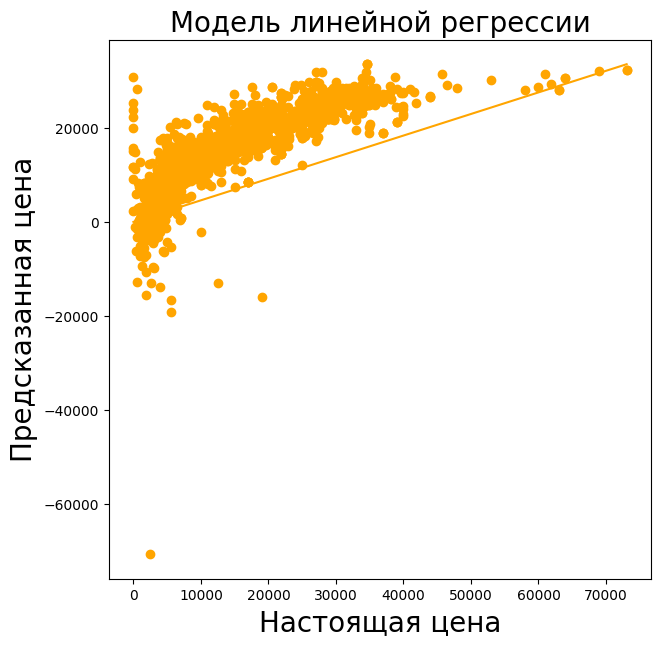

In [26]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test_lr_pred, color='orange') # рисуем точки оранжевым цветом
plt.plot([0, max(y_test)], [0, max(y_test_lr_pred)], color='orange') # рисуем оранжевую прямую
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.title('Модель линейной регрессии', fontsize=20)
plt.show()

# Визуализация прогноза модели случайного леса

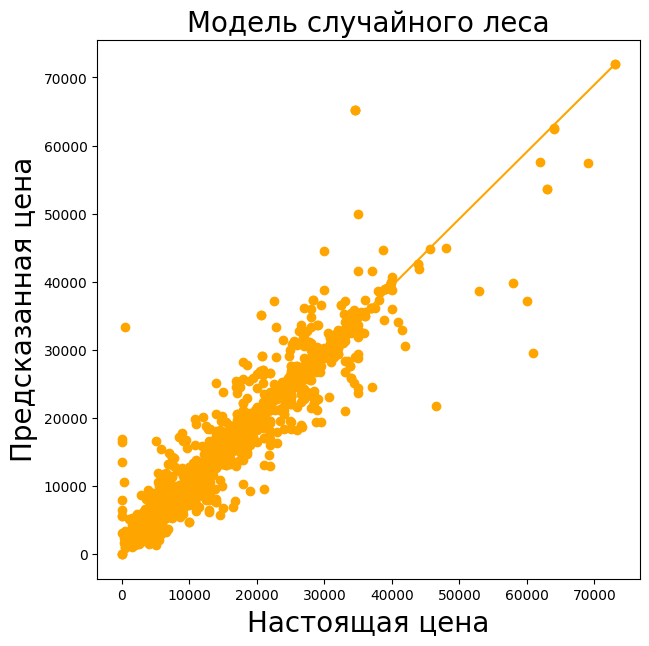

In [27]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test_rf_pred, color='orange')
plt.plot([0, max(y_test)], [0, max(y_test_rf_pred)], color='orange')
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.title('Модель случайного леса', fontsize=20)
plt.show()


In [28]:
def print_metrics(y, y_pred):
    print('Тренировочная MAE: {:.7f}'.format(mean_absolute_error(y, y_pred)))
    print('Тренировочная RMSE: {:.7f}'.format(mean_squared_error(y, y_pred, squared=False)))
    print('Тренировочная R^2: {:.7f}'.format(r2_score(y, y_pred)))

In [29]:
print_metrics(y_test, y_test_lr_pred)
print_metrics(y_test, y_test_rf_pred)

Тренировочная MAE: 4485.5561322
Тренировочная RMSE: 6656.3389129
Тренировочная R^2: 0.6222727
Тренировочная MAE: 1828.1467980
Тренировочная RMSE: 3543.7179021
Тренировочная R^2: 0.8929403


Модель случайного леса превосходит модель линейной регрессии в точности прогнозирования.

# Кодирование категориальных признаков в данные с помощью LabelEncoder

In [30]:
# Повторная загрузка данных
training_data = pd.read_excel('training_data.xlsx')
training_data = training_data.drop('Unnamed: 0', axis = 1)
training_data = training_data.dropna()

test_data = pd.read_excel('test_data.xlsx')
test_data = test_data.drop('Unnamed: 0', axis = 1)
test_data = test_data.dropna()
training_data.head(10)
test_data.head(10)

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,5990,2004,4,8,210445,clean,automatic,4wd,full-size,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,clean,automatic,4wd,full-size,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,clean,automatic,4wd,full-size,36.060541,-95.795447,57.0
8,20495,2013,3,6,108500,clean,automatic,4wd,full-size,42.612400,-83.034500,45.0
9,6000,2000,3,8,69600,clean,automatic,rwd,full-size,32.832296,-97.169012,67.0
10,13200,2008,3,8,111102,clean,automatic,rwd,mid-size,34.830920,-87.622840,61.0
11,19950,2013,2,6,143088,clean,other,4wd,full-size,37.132515,-94.474498,52.0
12,16899,2013,2,8,110305,clean,automatic,rwd,full-size,29.658215,-98.519420,67.0
15,2500,1997,1,8,174309,clean,automatic,4wd,full-size,39.296300,-76.100800,56.0
16,28488,2015,4,8,79557,clean,automatic,4wd,full-size,43.558671,-92.009977,43.0


In [31]:
text_categor_cols = ['title_status', 'transmission', 'drive', 'size']
le = LabelEncoder()
for col in text_categor_cols:
    training_data[col] = le.fit_transform(training_data[col]) + 1
    test_data[col] = le.transform(test_data[col]) + 1
training_data.head(10)

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,1,1,1,2,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,1,1,1,2,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,1,1,1,2,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,4,1,1,2,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,1,1,1,2,45.518031,-122.578752,50.0
6,8995,2006,3,8,115500,1,1,3,2,43.592223,-96.787488,38.0
7,5995,2005,3,6,191198,1,1,3,2,38.611926,-121.423565,59.0
9,5500,2007,3,6,139913,1,2,3,2,31.782356,-96.088975,67.0
10,8900,2008,2,8,124600,4,1,1,2,40.538400,-82.806200,49.0
11,19680,2015,4,6,135150,1,1,1,2,37.167749,-113.415403,50.0


In [32]:
target_variable_name = 'price'
# Тренировочные данные с закодированными категориальными признаками с помощью LabelEncoder
features = training_data.drop(target_variable_name, axis=1).columns
X_train_le, y_train_le = training_data[features], training_data[target_variable_name]
# Тестовые данные с закодированными категориальными признаками с помощью LabelEncoder
features = test_data.drop(target_variable_name, axis=1).columns
X_test_le, y_test_le = test_data[features], test_data[target_variable_name]

In [33]:
random_forest_model.fit(X_train_le, y_train_le)
y_test_rf_pred_le = random_forest_model.predict(X_test_le)
print_metrics(y_test_le, y_test_rf_pred_le)
print_metrics(y_test, y_test_rf_pred)

Тренировочная MAE: 1664.1186185
Тренировочная RMSE: 3329.9552447
Тренировочная R^2: 0.9054668
Тренировочная MAE: 1828.1467980
Тренировочная RMSE: 3543.7179021
Тренировочная R^2: 0.8929403


Text(0, 0.5, 'Предсказанная цена')

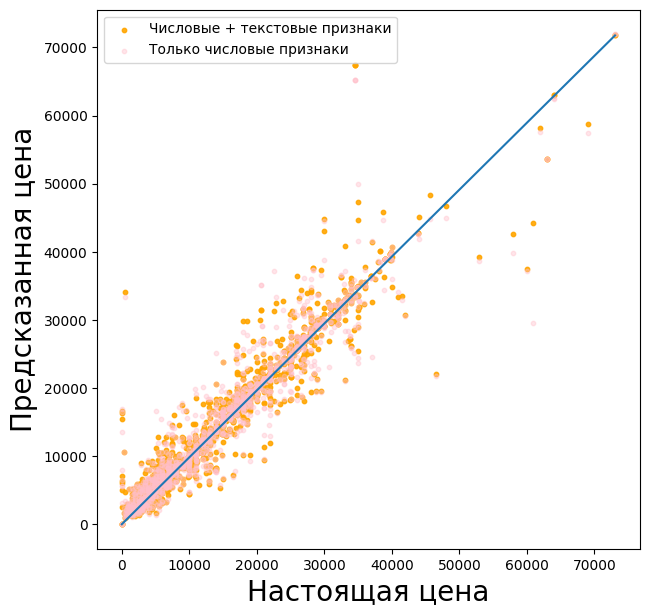

In [34]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test_le, y_test_rf_pred_le, alpha=0.9, label='Числовые + текстовые признаки', s=10, color='orange',)
plt.scatter(y_test, y_test_rf_pred, color='pink', alpha=0.4, label='Только числовые признаки', s=10)
plt.plot([0, max(y_test_le)], [0, max(y_test_rf_pred_le)])
plt.legend()
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)

In [35]:
training_data = pd.read_excel('training_data.xlsx')
training_data = training_data.drop('Unnamed: 0', axis = 1)
training_data = training_data.dropna()

test_data = pd.read_excel('test_data.xlsx')
test_data = test_data.drop('Unnamed: 0', axis = 1)
test_data = test_data.dropna()
training_data.head(10)
test_data.head(10)

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,5990,2004,4,8,210445,clean,automatic,4wd,full-size,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,clean,automatic,4wd,full-size,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,clean,automatic,4wd,full-size,36.060541,-95.795447,57.0
8,20495,2013,3,6,108500,clean,automatic,4wd,full-size,42.612400,-83.034500,45.0
9,6000,2000,3,8,69600,clean,automatic,rwd,full-size,32.832296,-97.169012,67.0
10,13200,2008,3,8,111102,clean,automatic,rwd,mid-size,34.830920,-87.622840,61.0
11,19950,2013,2,6,143088,clean,other,4wd,full-size,37.132515,-94.474498,52.0
12,16899,2013,2,8,110305,clean,automatic,rwd,full-size,29.658215,-98.519420,67.0
15,2500,1997,1,8,174309,clean,automatic,4wd,full-size,39.296300,-76.100800,56.0
16,28488,2015,4,8,79557,clean,automatic,4wd,full-size,43.558671,-92.009977,43.0


In [36]:
categor_cols = ['condition', 'cylinders', 'title_status', 'transmission', 'drive', 'size']
others_cols = ['price', 'year', 'odometer', 'lat', 'long', 'weather']

In [37]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [38]:
# Отделяем категориальные признаки от остальных у обучающей выборки и тестовой в отдельные таблички
categor_columns_training = training_data[categor_cols]
others_columns_training = training_data[others_cols]
categor_columns_test = test_data[categor_cols]
others_columns_test = test_data[others_cols]

In [39]:
result_encoding_training = one_hot_encoder.fit_transform(categor_columns_training)
result_encoding_test = one_hot_encoder.transform(categor_columns_test)

In [40]:
result_encoding_training = pd.DataFrame(result_encoding_training, index=training_data.index)
result_encoding_test = pd.DataFrame(result_encoding_test, index=test_data.index)

In [41]:
training_data = pd.concat([others_columns_training, result_encoding_training], axis=1)
test_data = pd.concat([others_columns_test, result_encoding_test], axis=1)

training_data.columns = training_data.columns.astype(str)
test_data.columns = test_data.columns.astype(str)
training_data.head(10)

,price,year,odometer,lat,long,weather,0,1,2,3,...,17,18,19,20,21,22,23,24,25,26
0,43900,2016,43500,36.471500,-82.483400,59.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,15490,2009,98131,40.468826,-74.281734,52.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2495,2002,201803,42.477134,-82.949564,45.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1300,2000,170305,40.764373,-82.349503,49.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,6995,2003,167662,45.518031,-122.578752,50.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,8995,2006,115500,43.592223,-96.787488,38.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,5995,2005,191198,38.611926,-121.423565,59.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,5500,2007,139913,31.782356,-96.088975,67.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10,8900,2008,124600,40.538400,-82.806200,49.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11,19680,2015,135150,37.167749,-113.415403,50.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
test_data.head(10)

,price,year,odometer,lat,long,weather,0,1,2,3,...,17,18,19,20,21,22,23,24,25,26
0,5990,2004,210445,38.731803,-90.073678,48.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18995,2015,142282,42.504823,-92.405569,47.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,23500,2012,100710,36.060541,-95.795447,57.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,20495,2013,108500,42.612400,-83.034500,45.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,6000,2000,69600,32.832296,-97.169012,67.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10,13200,2008,111102,34.830920,-87.622840,61.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,19950,2013,143088,37.132515,-94.474498,52.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
12,16899,2013,110305,29.658215,-98.519420,67.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
15,2500,1997,174309,39.296300,-76.100800,56.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
16,28488,2015,79557,43.558671,-92.009977,43.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
target_variable_name = 'price'

# Тренировочные данные с закодированными категориальными признаками с помощью OneHotEncoder
features = training_data.drop(target_variable_name, axis=1).columns
X_train_ohe, y_train_ohe = training_data[features], training_data[target_variable_name]

# Тестовые данные с закодированными категориальными признаками с помощью OneHotEncoder
features = test_data.drop(target_variable_name, axis=1).columns
X_test_ohe, y_test_ohe = test_data[features], test_data[target_variable_name]

In [44]:
# Обучение модели
random_forest_model.fit(X_train_ohe, y_train_ohe)

# Получение прогноза целевой переменной
y_test_rf_pred_ohe = random_forest_model.predict(X_test_ohe)

In [45]:
# Вычисление метрик с использованием категориальных признаков и кодирования OneHotEncoder
print('С категориальными признаками, OneHotEncoder:')
print_metrics(y_test_ohe, y_test_rf_pred_ohe)

# Вычисление метрик с использованием категориальных признаков и кодирования LabelEncoder
print('С категориальными признаками, LabelEncoder:')
print_metrics(y_test_le, y_test_rf_pred_le)

# Вычисление метрик без категориальных признаков
print('Без категориальных признаков:')
print_metrics(y_test, y_test_rf_pred)


С категориальными признаками, OneHotEncoder:
Тренировочная MAE: 1669.7746066
Тренировочная RMSE: 3345.1546371
Тренировочная R^2: 0.9046019
С категориальными признаками, LabelEncoder:
Тренировочная MAE: 1664.1186185
Тренировочная RMSE: 3329.9552447
Тренировочная R^2: 0.9054668
Без категориальных признаков:
Тренировочная MAE: 1828.1467980
Тренировочная RMSE: 3543.7179021
Тренировочная R^2: 0.8929403


# Визуализация результатов

Text(0, 0.5, 'Предсказанная цена')

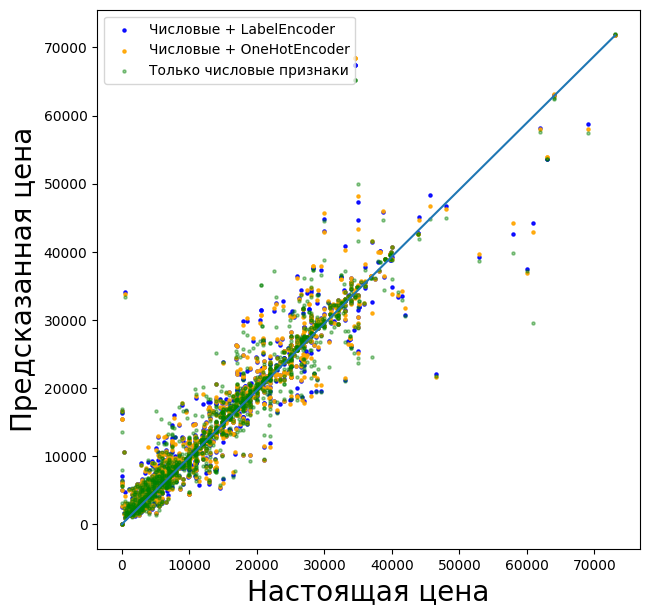

In [46]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test_le, y_test_rf_pred_le, color='blue', alpha=0.9, label='Числовые + LabelEncoder', s=5)
plt.scatter(y_test_ohe, y_test_rf_pred_ohe, color='orange', alpha=0.9, label='Числовые + OneHotEncoder', s=5)
plt.scatter(y_test, y_test_rf_pred, color='green', alpha=0.4, label='Только числовые признаки', s=5)
plt.plot([0, max(y_test_le)], [0, max(y_test_rf_pred_le)])
plt.legend()
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)